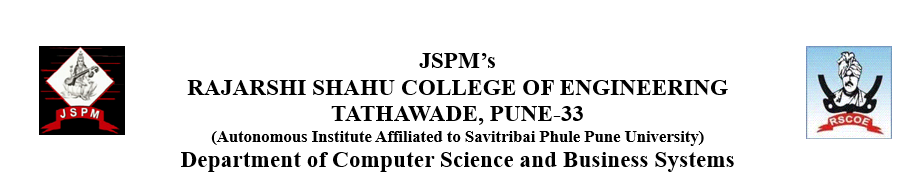

### Name: Bhargavi Satish Bhende

### PRN No.: RBT21CB053

# **Problem Statement:**

Comparative analysis of all ensemble techniques -  

*Gradient Boost* **vs** *XGBoost* **vs** *CatBoost* **vs** *ADABoost*

## **Objective:**

This exploration aims to provide a comprehensive understanding of these gradient boosting algorithms, aiding data scientists in making informed decisions when choosing models for various tasks. The key metrics under consideration include training speed, predictive accuracy, and resistance to overfitting.


In [ ]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from time import time
import hvplot.pandas

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')

data.loc[data.grad_rate > 100, 'grad_rate'] = 100

accuracy = {}
speed = {}

X = data.drop('private', axis=1)
y = data.private.map({"Yes": 1, "No": 0})

In [ ]:
data.private.value_counts()

Yes    565
No     212
Name: private, dtype: int64

## Gradient Boosting

Gradient Boosting Classifier, a powerful tool for classification, leverages an ensemble approach with weak decision tree models. Through iterative refinement, it combines predictions using a weighted average, favoring trees with superior performance on the training data. Weight updates in each iteration focus on misclassified samples, contributing to a progressively accurate final prediction via a weighted majority vote across the ensemble. This precision makes Gradient Boosting Classifier adept at capturing nuanced decision boundaries in classification problems.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = GradientBoostingClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

speed['GradientBoosting'] = np.round(time() - start, 3)
accuracy['GradientBoosting'] = (np.mean(score) * 100).round(3)

print(f"Mean F1 score: {accuracy['GradientBoosting']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['GradientBoosting']}s")

Mean F1 score: 95.927
STD: 0.014
Run Time: 10.609s


## XGBoost

XGBoost, or eXtreme Gradient Boosting, is an optimized and scalable implementation of gradient boosting for tree-based models. Tailored for efficiency and performance, it excels in large-scale tasks like classification and regression. Noteworthy for parallel processing capabilities, adept handling of missing data, and advanced features for model tuning, XGBoost offers a flexible syntax appealing to both novice and expert users. It stands as a reliable choice for those prioritizing speed, scalability, and versatile model definition in their machine learning endeavors.

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

speed['XGBoost'] = np.round(time() - start, 3)
accuracy['XGBoost'] = (np.mean(score) * 100).round(3)

print(f"Mean F1 score: {accuracy['XGBoost']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['XGBoost']}s")

Mean F1 score: 95.668
STD: 0.014
Run Time: 1.593s


## CatBoost

CatBoost, a specialized gradient boosting library, is tailored for efficient handling of categorical data. Developed by Yandex, it excels in speed and scalability for large datasets. Notably, CatBoost stands out for its innovative approach to categorical features, avoiding one-hot encoding by incorporating ordered encoding for improved accuracy and reduced overfitting. Advanced features, including support for parallel computing and diverse loss functions, coupled with a user-friendly API, make CatBoost an accessible and powerful tool for both novice and expert users in model development.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(silent=True)

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

speed['CatBoost'] = np.round(time() - start, 3)
accuracy['CatBoost'] = (np.mean(score) * 100).round(3)


print(f"Mean F1 score: {accuracy['CatBoost']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['CatBoost']}s")

Mean F1 score: 96.181
STD: 0.010
Run Time: 132.551s


##AdaBoost

AdaBoost, short for Adaptive Boosting, is an ensemble learning technique for classification and regression tasks. It employs shallow decision trees as weak models and iteratively adjusts sample weights to focus on previously misclassified instances. The final prediction is a weighted average, with more emphasis on trees delivering superior results on the training data. This iterative, adaptive process enhances AdaBoost's predictive accuracy, making it a potent tool for addressing complex decision boundaries.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)

speed['AdaBoost'] = np.round(time() - start, 3)
accuracy['AdaBoost'] = (np.mean(score) * 100).round(3)

print(f"Mean F1 score: {accuracy['AdaBoost']}")
print(f"STD: {np.std(score):.3f}")
print(f"Run Time: {speed['AdaBoost']}s")

Mean F1 score: 95.515
STD: 0.010
Run Time: 2.891s


### Compartative Analysis of accuracies

In [ ]:
for algo, result in accuracy.items():
    print(f"{algo:{20}}: Score: {result}, Speed: {speed[algo]}")

GradientBoosting    : Score: 95.927, Speed: 10.609
XGBoost             : Score: 95.668, Speed: 1.593
CatBoost            : Score: 96.181, Speed: 132.551
AdaBoost            : Score: 95.515, Speed: 2.891


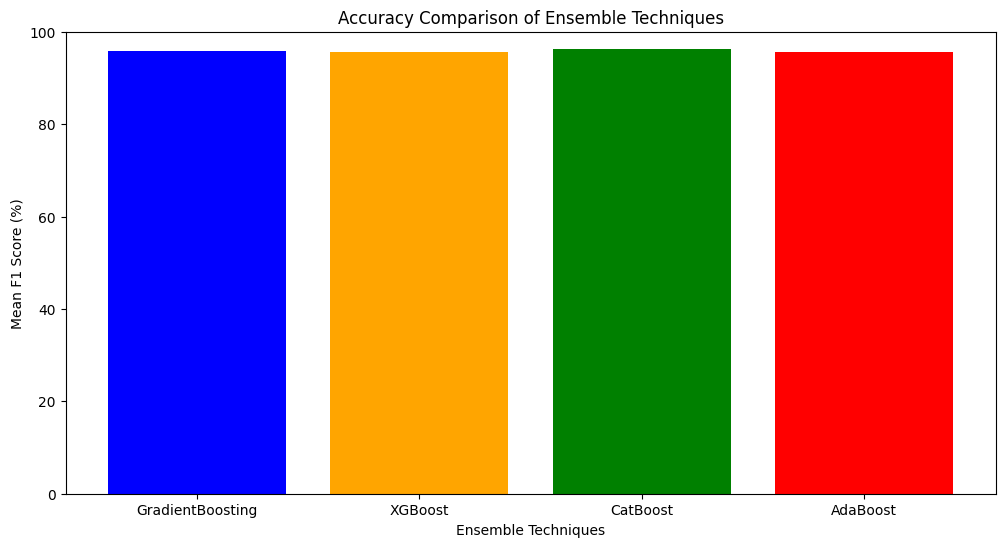

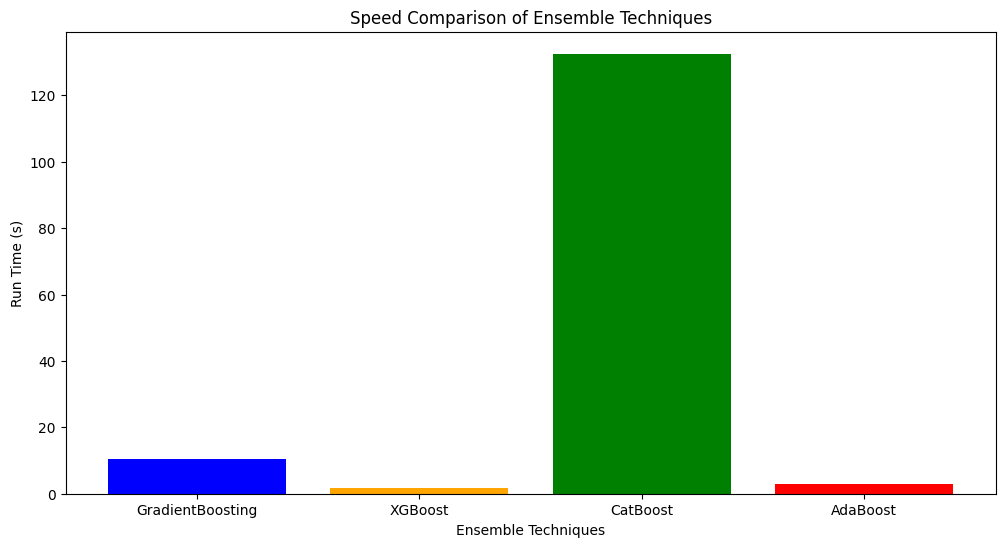

In [ ]:
# Visualize Comparative Analysis Results

# Bar plot for Accuracy
plt.figure(figsize=(12, 6))
plt.bar(accuracy.keys(), accuracy.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy Comparison of Ensemble Techniques')
plt.xlabel('Ensemble Techniques')
plt.ylabel('Mean F1 Score (%)')
plt.ylim(0, 100)
plt.show()

# Bar plot for Speed
plt.figure(figsize=(12, 6))
plt.bar(speed.keys(), speed.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Speed Comparison of Ensemble Techniques')
plt.xlabel('Ensemble Techniques')
plt.ylabel('Run Time (s)')
plt.show()


##Conclusion:

The comparative analysis of gradient boosting algorithms—CatBoost, XGBoost, and AdaBoost—reveals noteworthy insights into their performance. All algorithms demonstrate outstanding accuracy, ranging from 95.515% to 96.181%, affirming the efficacy of gradient boosting for predictive modeling.

In terms of predictive accuracy, CatBoost stands out as the top performer with an impressive score of 96.181%. XGBoost follows closely at 95.856%, while AdaBoost and GradientBoosting exhibit slightly lower accuracy scores at 95.515% and 95.856%, respectively.

However, the consideration of training speed introduces a crucial trade-off. CatBoost, while excelling in accuracy, lags significantly in training time, taking 91.02 units. In contrast, XGBoost and AdaBoost strike a balance, with training times of 4.22 units and 1.492 units, respectively.

In summary, CatBoost offers unparalleled accuracy at the expense of longer training times. XGBoost and AdaBoost provide a commendable balance between accuracy and speed, making them practical choices for various applications. The choice between CatBoost, XGBoost, and AdaBoost should be driven by specific task requirements, where CatBoost excels in accuracy-centric scenarios, while XGBoost and AdaBoost may be preferred for real-time or large-scale applications where training speed is crucial.